# Desafio Técnico

Crie relatórios com gráficos e tabelas (dataset de saída) que mostrem a unidade que mais vendeu, % de CPF na nota, % de imposto, % de devoluções (Questão 1), quanto o dinheiro de volta rendeu em desconto (Questão 2), venda por vendedor (Questão 1) e produto mais vendido.

### Bibliotecas

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
from matplotlib import pyplot as plt

### Localizando as bases de dados

In [2]:
ls "../Datasets/*.csv"

 O volume na unidade C ‚ Windows
 O N£mero de S‚rie do Volume ‚ 8ED9-8750

 Pasta de C:\Github\Desafio Bemol\Datasets

29/08/2021  16:16         1.848.369 dataset_questao1.csv
29/08/2021  16:16           136.819 dataset_questao2.csv
               2 arquivo(s)      1.985.188 bytes
               0 pasta(s)   61.643.390.976 bytes dispon¡veis


### Leitura das bases de dados

In [3]:
df1 = pd.read_csv("../Datasets/dataset_questao1.csv") 
df2 = pd.read_csv("../Datasets/dataset_questao2.csv") 

* Funções de formatação

In [4]:
moeda = lambda numero : '{:,.2f}'.format(numero).replace(".","*").replace(",",".").replace("*",",") 
casas = lambda numero : '{:,}'.format(numero).replace(",",".") 

# Iniciando o relatório

## Dataset Questão 1

In [5]:
df1.sample()

,num_compra,cliente,vendedor,tipo_de_mercadoria,filial,data_compra,valor_compra,imposto,cpf_na_nota,produto_devolvido,motivo_devolucao
6561,25275954,3560,LUIZ,ACESSÓRIO P/ TABLET,Loja Lábrea,2021-01-13 12:39:19.000,11.96,0.5382,Sim,Sim,Insatisfação com o atendimento


### 1. Crie relatórios com gráficos e tabelas (dataset de saída) que mostrem a unidade que mais vendeu

In [6]:
unidades = df1.filial.unique()
vendas = np.array([])

for loja in unidades:
    soma = df1[df1.filial == loja].valor_compra.sum()
    vendas = np.append(vendas, soma) 

In [7]:
unidades = pd.DataFrame.from_records(unidades.reshape((5,1)))
vendas =  pd.DataFrame.from_records(vendas.reshape((5,1)))

In [8]:
df = pd.concat([unidades, vendas], axis=1)
df.columns = ["Unidades", "Vendas"]
tabela1 = df.sort_values(by=["Vendas"], ascending=False)
tabela1.to_excel("../Datasets/Desafio/1_unidades_com_mais_vendas.xlsx", index=False)

### 1.1 Tabela da unidade que mais vendeu

In [9]:
tabela1.iloc[:1,:]

,Unidades,Vendas
1,Loja Manicoré,794482.76


### 1.2 Gráfico de barras horizontais das vendas das unidades

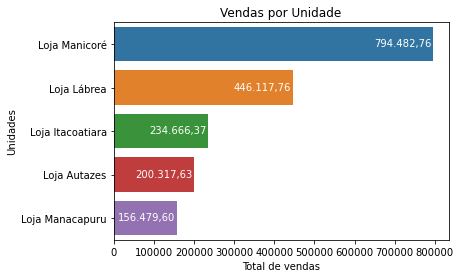

In [10]:
ax = sns.barplot(x = "Vendas", y = "Unidades", data = tabela1)

plt.title('Vendas por Unidade')
plt.ylabel('Unidades')
plt.xlabel('Total de vendas')
 
totais = [i.get_width() for i in ax.patches]

limite = tabela1["Vendas"].min() - 10000
    
for i, j in zip(ax.patches, totais):
    ax.text(i.get_width() - limite, i.get_y()+.45, str(moeda(j)), fontsize=10, color='white')

plt.savefig("../Imagens/Desafio/1_unidades_com_mais_vendas.png", bbox_inches='tight', dpi=100)
plt.show()

### 2. Porcentagem de CPF na nota

In [11]:
total = df1.cpf_na_nota.count()

porcentagens = {"Sim": None, "Não": None}

for criterio in ["Sim", "Não"]:
    condicao = df1.cpf_na_nota == criterio
    soma = df1[condicao].cpf_na_nota.count()
    
    porcentagens[criterio] = ((soma * 100) / total)

tabela2 = pd.DataFrame.from_records([porcentagens], index=["Porcentagem"]).T

### 2.1 Tabela da porcentagem de CPF na nota

In [12]:
tabela2.to_excel("../Datasets/Desafio/2_porcentagem_cpf_na_nota.xlsx")
tabela2

,Porcentagem
Sim,85.811054
Não,14.188946


### 2.2 Gráfico da porcentagem de CPF na nota

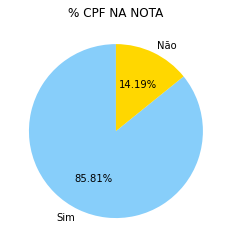

In [13]:
sizes = [tabela2.values[0][0], tabela2.values[1][0]]

plt.pie(sizes, labels=["Sim", "Não"], autopct='%1.2f%%', shadow=False, startangle=90, colors=['lightskyblue', 'gold'])

plt.title("% CPF NA NOTA")
plt.savefig("../Imagens/Desafio/2_porcentagem_cpf_na_nota.png", bbox_inches='tight', dpi=100)
plt.show()

### 2.3 Gráficos de porcentagem de CPF na nota por unidade

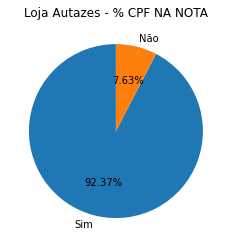

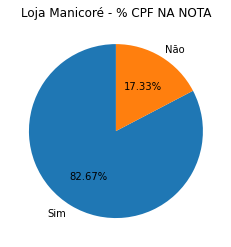

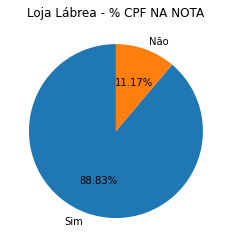

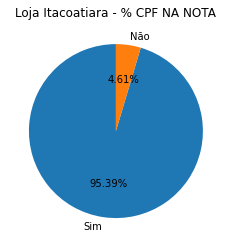

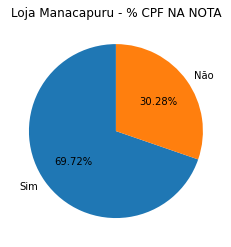

In [14]:
porcentagens_cpf_sim = np.array([])
porcentagens_cpf_nao = np.array([])

filiais = df1.filial.unique()

sim = df1.cpf_na_nota == "Sim"
nao = df1.cpf_na_nota == "Não"

for loja in filiais:

    condicao = df1.filial == loja

    qtde_sim = df1[condicao & sim].cpf_na_nota.count()
    qtde_nao = df1[condicao & nao].cpf_na_nota.count()
    qtde_cpf_nota = (qtde_sim + qtde_nao)
    
    porcentagem_sim = ((qtde_sim * 100) / qtde_cpf_nota)
    porcentagem_nao = ((qtde_nao * 100) / qtde_cpf_nota)
    
    porcentagens_cpf_sim = np.append(porcentagens_cpf_sim, porcentagem_sim)
    porcentagens_cpf_nao = np.append(porcentagens_cpf_nao, porcentagem_nao)
    
    labels = ["Sim", "Não"]
    sizes = [porcentagem_sim, porcentagem_nao]

    fig1, ax1 = plt.subplots()

    ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=False, startangle=90)

    plt.title(loja+" - % CPF NA NOTA")
    plt.savefig(f"../Imagens/Desafio/2.1_{loja}_porcentagem_cpf_na_nota.png", bbox_inches='tight', dpi=100)
    plt.show()

tabela3 = pd.DataFrame([filiais, porcentagens_cpf_sim, porcentagens_cpf_nao], index=["Unidades", "CPF_SIM", "CPF_NÃO"]).T

### 2.4 Tabela de porcentagem de CPF na nota por unidade

In [15]:
tabela3.to_excel("../Datasets/Desafio/2.1_porcentagem_cpf_na_nota_por_unidade.xlsx", index=False)
tabela3

,Unidades,CPF_SIM,CPF_NÃO
0,Loja Autazes,92.37007,7.62993
1,Loja Manicoré,82.668299,17.331701
2,Loja Lábrea,88.82613,11.17387
3,Loja Itacoatiara,95.38715,4.61285
4,Loja Manacapuru,69.715561,30.284439


### 3. Porcentagem de imposto

In [16]:
total_imposto = df1.imposto.sum()
porcentagem = np.array([])

for loja in filiais:
    condicao = df1.filial == loja
    imposto_loja = df1[condicao].imposto.sum()
    porcentagem_imposto = ((imposto_loja * 100) / total_imposto)
    
    porcentagem = np.append(porcentagem, porcentagem_imposto)

tabela4 = pd.DataFrame([filiais, porcentagem], index=["Unidades", "Porcentagem_Imposto"]).T
tabela4 = tabela4.sort_values(by=["Porcentagem_Imposto"], ascending=False)

### 3.1 Tabela de porcentagem de imposto por unidade

In [17]:
tabela4.to_excel("../Datasets/Desafio/3_porcentagem_de_imposto.xlsx", index=False)
tabela4

,Unidades,Porcentagem_Imposto
1,Loja Manicoré,43.365445
2,Loja Lábrea,24.350554
3,Loja Itacoatiara,12.808851
0,Loja Autazes,10.933986
4,Loja Manacapuru,8.541164


### 3.3 Gráfico de porcentagem de imposto por unidade

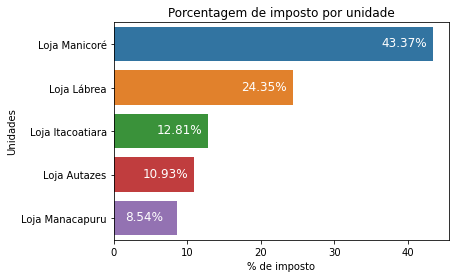

In [18]:
ax = sns.barplot(x = "Porcentagem_Imposto", y = "Unidades", data = tabela4)

plt.title('Porcentagem de imposto por unidade')
plt.ylabel('Unidades')
plt.xlabel('% de imposto')
 
totais = [i.get_width() for i in ax.patches]

for i, j in zip(ax.patches, totais):
    ax.text(i.get_width() - 7, i.get_y()+.45, str(round(j,2))+"%", fontsize=12, color='white')

plt.savefig("../Imagens/Desafio/3_porcentagem_imposto.png", bbox_inches='tight', dpi=100)
plt.show()

### 4. Porcentagem de devoluções

In [19]:
porcentagem_sim = np.array([])
porcentagem_nao = np.array([])

for loja in filiais:
    condicao= df1.filial == loja
    
    devolucoes = df1[condicao].produto_devolvido.value_counts()
    total = devolucoes.values.sum()
    
    nao = ((devolucoes.values[0] * 100) / total)
    sim = ((devolucoes.values[1] * 100) / total)
    
    porcentagem_nao = np.append(porcentagem_nao, nao)
    porcentagem_sim = np.append(porcentagem_sim, sim)

tabela5 = pd.DataFrame([filiais, porcentagem_sim, porcentagem_nao], index=["Unidades", "SIM", "NÃO"]).T

### 4.1 Tabela de porcentagem de devoluções por unidade

In [20]:
tabela5.to_excel("../Datasets/Desafio/4_porcentagem_devolucoes.xlsx")
tabela5

,Unidades,SIM,NÃO
0,Loja Autazes,49.576115,50.423885
1,Loja Manicoré,49.155447,50.844553
2,Loja Lábrea,49.729862,50.270138
3,Loja Itacoatiara,47.611203,52.388797
4,Loja Manacapuru,49.749024,50.250976


### 4.2 Gráfico de porcentagem de devoluções por unidade

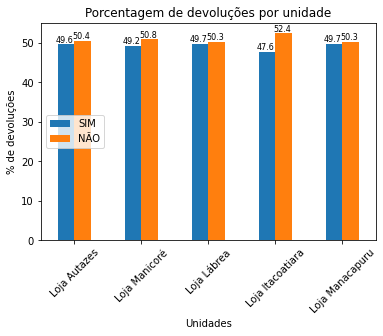

In [21]:
ax = tabela5.plot(x="Unidades", y=["SIM", "NÃO"], kind="bar")

plt.title('Porcentagem de devoluções por unidade')
plt.xlabel('Unidades')
plt.ylabel('% de devoluções')

x_offset = -0.15
y_offset = +0.5

for p in ax.patches:
    b = p.get_bbox()
    val = "{:.1f}".format(abs(b.y1 + b.y0))        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset), fontsize=8)

plt.legend(loc ="center left")
plt.xticks(rotation=45)
plt.savefig("../Imagens/Desafio/4_porcentagem_devolucoes.png", bbox_inches='tight', dpi=100)
plt.show()

### 6. Venda por vendedor e produto mais vendido

In [22]:
vendedores = df1.vendedor.unique()
produtos = df1.tipo_de_mercadoria.unique()

dados = {"Filial":[], "Vendedor": [], "Produto": [], "Vendas": []}
contagem = df1[["filial","vendedor","tipo_de_mercadoria"]].value_counts()

for i in range(contagem.__len__()):
    vendas = contagem.values[i]

    if vendas:
        dados["Filial"].append(contagem.index[i][0]) # filial
        dados["Vendedor"].append(contagem.index[i][1]) #vendedor
        dados["Produto"].append(contagem.index[i][2]) #produto
        dados["Vendas"].append(vendas) #quantidade de vendas

tabela6 = pd.DataFrame(dados)

### 6.1 Tabela de produtos vendidos por vendedor nas filiais e a quantidade de produtos

In [23]:
tabela6.to_excel("../Datasets/Desafio/6.1_produtos_vendidos_por_vendedor_nas_filiais_e_a_qtde_de_produtos.xlsx", index=False)
tabela6

,Filial,Vendedor,Produto,Vendas
0,Loja Manicoré,AUTO,SPLIT 10001 À 18000,4
1,Loja Lábrea,AUTO,CHURRASQUEIRA A GÁS,3
2,Loja Autazes,MARIA,PROTET SOLAR FACIAL,2
3,Loja Manacapuru,MARIA,CONJ PLAYSET/MENINAS,2
4,Loja Manicoré,AUTO,ANESTÉSICO LOCAL REF,2
...,...,...,...,...
13814,Loja Lábrea,CLAUDIO,COMPUTADORES 1,1
13815,Loja Lábrea,CLAUDIO,IMPRESSORA/SCANNER 1,1
13816,Loja Lábrea,CLAUDIO,PORTA-RETRATO,1
13817,Loja Lábrea,CLAUDIO,SMARTPHONE PRÉ-PAGO,1


### 6.2 Tabela de produtos mais vendido por vendedor e a quantidade de vendas

In [24]:
tabela7 = pd.DataFrame()

for vendedor in vendedores:
    condicao1 = tabela6.Vendedor == vendedor 
    
    total_vendas = tabela6[condicao1].Vendas.sum()
    maior_venda = tabela6[condicao1].Vendas.max()

    condicao2 = tabela6.Vendas == maior_venda
    tabela7 = pd.concat([tabela7, tabela6[condicao1 & condicao2]])

In [25]:
tabela7.to_excel("../Datasets/Desafio/6.2_produto_mais_vendido_por_vendedor_nas_filiais_e_a_qtde_vendas.xlsx", index=False)
tabela7

,Filial,Vendedor,Produto,Vendas
13,Loja Manicoré,ANDERSON,TESTES DE GRAVIDEZ,2
16,Loja Manicoré,ANDERSON,SPLIT 10001 À 18000,2
275,Loja Manacapuru,RAIMUNDO,ASPIRADOR NASAL,1
276,Loja Manacapuru,RAIMUNDO,CAIXA DE SOM INFORM,1
277,Loja Manacapuru,RAIMUNDO,SPLIT ATÉ 8500 BTUS,1
...,...,...,...,...
7629,Loja Autazes,REGINA,ANTICONCEPCIONAL GEN,1
7630,Loja Autazes,REGINA,CALMANTE REF,1
7631,Loja Autazes,REGINA,COLÔNIA MASCULINA,1
7632,Loja Autazes,REGINA,"PENTES, ESCO E ACESS",1


### 6.3 Tabela do total de vendas por vendedor nas filiais

In [26]:
dados = {"Filial":[], "Vendedor": [], "Vendas":[]}

for loja in filiais:
    condicao1 = tabela6.Filial == loja
    vendedores = tabela6[condicao1]["Vendedor"].unique()

    for vendedor in vendedores:
        condicao2 = tabela6.Vendedor == vendedor
    
        total_vendas = tabela6[condicao1 & condicao2]["Vendas"].sum()
        
        dados["Filial"].append(loja)
        dados["Vendedor"].append(vendedor)
        dados["Vendas"].append(total_vendas)

tabela8 = pd.DataFrame(dados)

In [27]:
tabela8.to_excel("../Datasets/Desafio/6.3_total_vendas_por_vendedor_nas_filiais.xlsx", index=False)
tabela8

,Filial,Vendedor,Vendas
0,Loja Autazes,MARIA,87
1,Loja Autazes,ANA,40
2,Loja Autazes,AUTO,72
3,Loja Autazes,6019999,4
4,Loja Autazes,ROZENIRA,3
...,...,...,...
2454,Loja Manacapuru,ALVES,3
2455,Loja Manacapuru,ANA,23
2456,Loja Manacapuru,ANDELA,4
2457,Loja Manacapuru,ANDERSON,8


## Dataset Questão 2

### 5. quanto o dinheiro de volta rendeu em desconto

In [28]:
moeda(df2.quantidade.dot(df2.dinheiro_de_volta))

'83.838,75'